<a href="https://colab.research.google.com/github/IgorNowacki/Chest-X-Ray-Images-classification---Pneumonia-detection-CNN-/blob/main/Pneumonia_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Pneumonia is an infection that causes inflammation of the air sacs in one or both lungs, with the possibility of them filling with fluid or pus. This can cause coughing with phlegm or pus, fever, chills, and difficulty breathing. Bacterial and viral pathogens are the two primary causes of pneumonia, each requiring a different form of treatment, such as antibiotics for bacterial and supportive care for viral. The WHO reports that pneumonia kills around 2 million children under five every year, with a majority of cases seen in developing countries in Southeast Asia and Africa. The use of radiographic data such as chest X-rays is essential for diagnosis, and rapid interpretation of images is necessary in order to provide urgent intervention. To this end, the effectiveness of transfer learning frameworks for classifying pediatric chest X-rays to detect pneumonia and differentiate between viral and bacterial pneumonia is being studied, so as to facilitate rapid referrals to those in need.

The WHO states that pneumonia kills around 2 million children under five annually, outnumbering deaths from HIV/AIDS, malaria, and measles combined. A majority of new cases are reported in the developing countries of Southeast Asia and Africa. Bacterial and viral pathogens are the two primary causes of pneumonia, each requiring a different form of treatment - antibiotics for bacterial and supportive care for viral. Accurate and timely diagnosis is essential, which involves the use of radiographic data such as chest X-rays to 
differentiate between the different types of pneumonia. However, in low-resource settings, rapid interpretation of images is not always available. Therefore, the effectiveness of transfer learning frameworks in classifying pediatric chest X-rays to detect pneumonia and differentiate between viral and bacterial pneumonia is being investigated to facilitate rapid referrals to those in need of urgent intervention.

This dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). It consists of 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). The chest X-ray images (anterior-posterior) were taken from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. These images were checked for quality control and graded by two expert physicians before being used to train the AI system. The evaluation set was also checked by a third expert to account for any grading errors.

In [1]:
#Importing essential libraries 
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
from PIL import Image
import glob
import plotly.graph_objs as go
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout , BatchNormalization
import tensorflow as tf
from plotly.offline import init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
#Data set loading
path="/content/drive/MyDrive/chest_xray"
print (os.listdir(path))

train_folder= glob.glob('/content/drive/MyDrive/chest_xray/train/**/*.jpeg')
val_folder = glob.glob('/content/drive/MyDrive/chest_xray/val/**/*.jpeg')
test_folder =glob.glob( '/content/drive/MyDrive/chest_xray/test/**/*.jpeg')

train_n = "/content/drive/MyDrive/chest_xray/train/NORMAL/"
train_p = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA/"
print("/"*60)

#Checking distribution in train data set
print(f"Train data set - healthy lungs pictures qty:{ len(os.listdir(train_n))}")
print(f"Train data set - lungs with PNEUMONIA pictures qty:",len(os.listdir(train_p)))
print("/"*60)

#Checking numbers of photos in each set
print(f"Training Set has: {len(train_folder)} images")
print(f"Testing Set has: {len(test_folder)} images")
print(f"Validation Set has: {len(val_folder)} images")
print("/"*60)

#Checking total number of photos in dataset
data_sets=["train","test", "val"]
pneumonia_pic =[]
healthy_pic=[]
for i in data_sets:
    healthy = glob.glob(os.path.join(os.path.join(path, i), "NORMAL/*.jpeg"))
    pneumonia = glob.glob(os.path.join(os.path.join(path, i), "PNEUMONIA/*.jpeg"))
    healthy_pic.extend(healthy)
    pneumonia_pic.extend(pneumonia)

print(f"Total number of pictures of lungs with PNEUMONIA: {len(pneumonia_pic)} images")
print(f"Total number of pictures of healthy lungs: {len(healthy_pic)} images")
print("/"*60)

#Plot chart printing
fig = go.Figure(data=[go.Pie(labels=['Healthy','Pneumonia'],
                             values=[len(healthy_pic), len(pneumonia_pic)])])
fig.update_traces(hoverinfo='value', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=['royalblue','darkblue'], line=dict(color='#000000', width=1)))
fig.update_layout(title="Distribution of lungs pictures",
                  titlefont={'size': 30},      
                  )
iplot(fig)


['.DS_Store', 'train', 'val', 'test']
////////////////////////////////////////////////////////////
Train data set - healthy lungs pictures qty:1342
Train data set - lungs with PNEUMONIA pictures qty: 3876
////////////////////////////////////////////////////////////
Training Set has: 5216 images
Testing Set has: 624 images
Validation Set has: 16 images
////////////////////////////////////////////////////////////
Total number of pictures of lungs with PNEUMONIA: 4273 images
Total number of pictures of healthy lungs: 1583 images
////////////////////////////////////////////////////////////


Printing random pictures of healthy and pneumonia lungs

////////////////////////////////////////////////////////////////////////////////////////////////////
Helthy lungs picture name is:  IM-0256-0001.jpeg and IM-0523-0001-0001.jpeg
////////////////////////////////////////////////////////////////////////////////////////////////////
Lungs with PNEUMONIA picture name is: person23_bacteria_87.jpeg and person493_virus_999.jpeg
////////////////////////////////////////////////////////////////////////////////////////////////////


Text(0.5, 1.0, 'Lungs with Pneumonia')

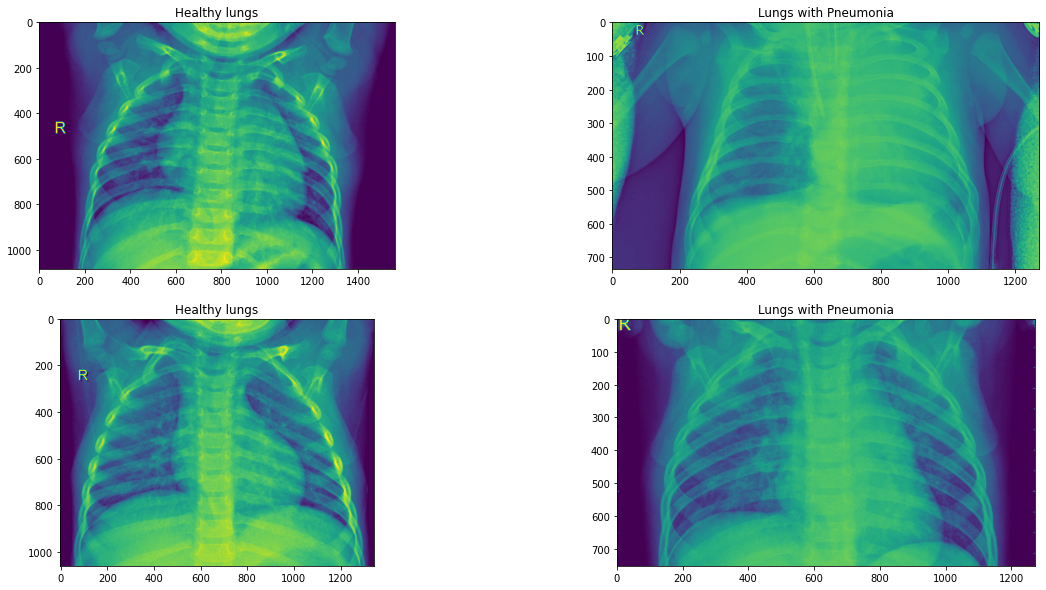

In [3]:
#Healthy lungs pictures
print("/"*100)
rand_n= np.random.randint(0,len(os.listdir(train_n)))
rand_n1= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_n]
norm_pic1 = os.listdir(train_n)[rand_n1]
print('Helthy lungs picture name is: ',norm_pic,"and",norm_pic1)
print("/"*100)

#PNEUMONIA lungs pictures
rand_p = np.random.randint(0,len(os.listdir(train_p)))
rand_p1 = np.random.randint(0,len(os.listdir(train_p)))
sic_pic =  os.listdir(train_p)[rand_p]
sic_pic1 =  os.listdir(train_p)[rand_p1]
print('Lungs with PNEUMONIA picture name is:', sic_pic,"and",sic_pic1)
print("/"*100)

#images loading
norm_image= Image.open(train_n+norm_pic)
norm_image1= Image.open(train_n+norm_pic1)
sic_image= Image.open(train_p+sic_pic)
sic_image1= Image.open(train_p+sic_pic1)

#ploting random images
f = plt.figure(figsize= (20,10))
a1 = f.add_subplot(2,2,1)
img_plot = plt.imshow(norm_image)
a1.set_title('Healthy lungs')
a2 = f.add_subplot(2, 2, 2)
img_plot = plt.imshow(sic_image)
a2.set_title('Lungs with Pneumonia')
a3 = f.add_subplot(2,2,3)
img_plot = plt.imshow(norm_image1)
a3.set_title('Healthy lungs')
a4 = f.add_subplot(2, 2, 4)
img_plot = plt.imshow(sic_image1)
a4.set_title('Lungs with Pneumonia')

Data preparation for model training

In [4]:
#Creating training and validation data set with Keras Image DataGenerator.
train_generator = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=0.2,
    zoom_range=0.2
)
val_generator = ImageDataGenerator(
    rescale=1/255.,
)

In [5]:
#Preparing data for training
Train = train_generator.flow_from_directory(
    "/content/drive/MyDrive/chest_xray/train",batch_size=16,
    target_size=(224, 224),
)
val = val_generator.flow_from_directory(
    "/content/drive/MyDrive/chest_xray/val",batch_size=8,
    target_size=(224, 224),
)
Test= val_generator.flow_from_directory(
    "/content/drive/MyDrive/chest_xray/test",batch_size=8,
    target_size=(224, 224),
)

test_labels=Test.class_indices.keys()
print(test_labels)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
dict_keys(['NORMAL', 'PNEUMONIA'])


First model training

In [6]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [7]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [8]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

cnn_model1= model1.fit(Train,epochs=60,validation_data=val,steps_per_epoch=50,callbacks=[early_stopping_cb])

Epoch 1/60
50/50 [==============================] - 175s 3s/step - loss: 0.5106 - accuracy: 0.7563 - val_loss: 1.3274 - val_accuracy: 0.6250
Epoch 2/60
50/50 [==============================] - 146s 3s/step - loss: 0.3760 - accuracy: 0.8388 - val_loss: 0.7625 - val_accuracy: 0.7500
Epoch 3/60
50/50 [==============================] - 108s 2s/step - loss: 0.2750 - accuracy: 0.8800 - val_loss: 1.1042 - val_accuracy: 0.6250
Epoch 4/60
50/50 [==============================] - 97s 2s/step - loss: 0.2561 - accuracy: 0.8875 - val_loss: 0.9221 - val_accuracy: 0.6250
Epoch 5/60
50/50 [==============================] - 83s 2s/step - loss: 0.2966 - accuracy: 0.8763 - val_loss: 1.4466 - val_accuracy: 0.6250
Epoch 6/60
50/50 [==============================] - 71s 1s/step - loss: 0.2561 - accuracy: 0.8938 - val_loss: 0.4926 - val_accuracy: 0.8125
Epoch 7/60
50/50 [==============================] - 63s 1s/step - loss: 0.2290 - accuracy: 0.9025 - val_loss: 0.5829 - val_accuracy: 0.6875
Epoch 8/60
50/50 

78/78 [==============================] - 142s 2s/step - loss: 0.4271 - accuracy: 0.7933
Train data accuracy is: 91.679447889328 %
Test data accuracy is: 79.32692170143127 %
78/78 [==============================] - 8s 100ms/step


Text(0.5, 1.0, 'Accuracy Evolution')

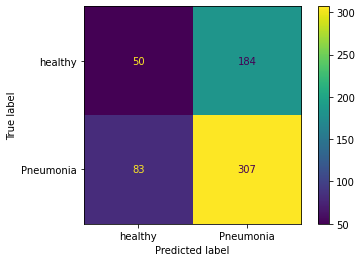

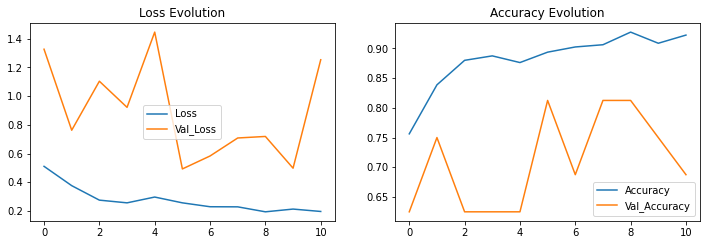

In [9]:
# Train and test data accuracy
train_acc1 = model1.evaluate(Train,steps=326)
test_acc1 = model1.evaluate(Test,steps=78)
print (f'Train data accuracy is: {train_acc1[1]*100} %')
print (f'Test data accuracy is: {test_acc1[1]*100} %')

# Confusion matrix
Y_pred = model1.predict(Test, steps = len(Test))
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Test.classes, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['healthy','Pneumonia'])
cmd.plot()

#Printing loss and accuracy evolution 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_model1.history['loss'], label='Loss')
plt.plot(cnn_model1.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn_model1.history['accuracy'], label='Accuracy')
plt.plot(cnn_model1.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Second model training

In [10]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)))
model2.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model2.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model2.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [11]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [12]:
cnn_model2=model2.fit_generator(Train,epochs=60,validation_data=val,steps_per_epoch=50,callbacks=[early_stopping_cb])

<ipython-input-12-ea4a9dae19f2>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/60
50/50 [==============================] - 22s 412ms/step - loss: 0.6006 - accuracy: 0.7325 - val_loss: 0.9254 - val_accuracy: 0.5000
Epoch 2/60
50/50 [==============================] - 21s 414ms/step - loss: 0.5414 - accuracy: 0.7375 - val_loss: 1.1872 - val_accuracy: 0.5625
Epoch 3/60
50/50 [==============================] - 21s 419ms/step - loss: 0.4264 - accuracy: 0.7975 - val_loss: 1.1180 - val_accuracy: 0.6250
Epoch 4/60
50/50 [==============================] - 21s 418ms/step - loss: 0.3412 - accuracy: 0.8525 - val_loss: 0.5936 - val_accuracy: 0.6250
Epoch 5/60
50/50 [==============================] - 23s 466ms/step - loss: 0.3154 - accuracy: 0.8712 - val_loss: 0.7001 - val_accuracy: 0.6875
Epoch 6/60
50/50 [==============================] - 21s 414ms/step - loss: 0.2165 - accuracy: 0.9075 - val_loss: 1.0841 - val_accuracy: 0.6250
Epoch 7/60
50/50 [==============================] - 21s 415ms/step - loss: 0.2544 - accuracy: 0.9050 - val_loss: 0.5335 - val_accuracy: 0.8125

78/78 [==============================] - 8s 105ms/step - loss: 0.4397 - accuracy: 0.7869
Train data accuracy is: 91.58359169960022 %
Test data accuracy is: 78.68589758872986 %
78/78 [==============================] - 8s 103ms/step


Text(0.5, 1.0, 'Accuracy Evolution')

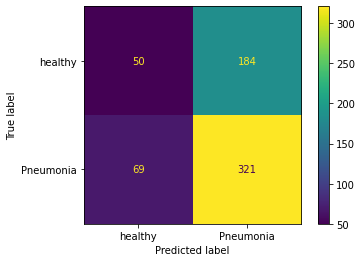

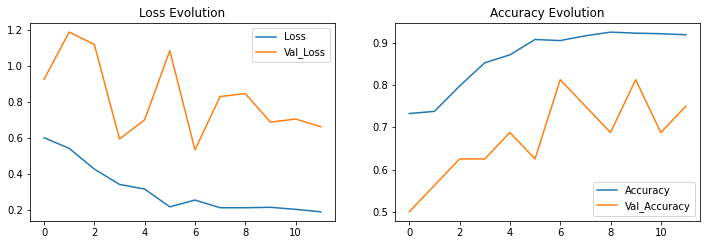

In [13]:
# Train and test data accuracy
train_acc2 = model2.evaluate(Train,steps=326)
test_acc2= model2.evaluate(Test,steps=78)
print (f'Train data accuracy is: {train_acc2[1]*100} %')
print (f'Test data accuracy is: {test_acc2[1]*100} %')

# Confusion matrix
Y_pred = model2.predict(Test, steps = len(Test))
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Test.classes, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['healthy','Pneumonia'])
cmd.plot()

#Printing loss and accuracy evolution 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_model2.history['loss'], label='Loss')
plt.plot(cnn_model2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn_model2.history['accuracy'], label='Accuracy')
plt.plot(cnn_model2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Third model training

In [14]:
from tensorflow.keras.layers import Dropout

model3 = Sequential()
model3.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)))
model3.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model3.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model3.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(2, activation='softmax'))

In [15]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [16]:
cnn_model3=model3.fit(Train,epochs=60,validation_data=val,steps_per_epoch=50,callbacks=[early_stopping_cb])

Epoch 1/60
50/50 [==============================] - 23s 437ms/step - loss: 0.6325 - accuracy: 0.7175 - val_loss: 0.8039 - val_accuracy: 0.5000
Epoch 2/60
50/50 [==============================] - 21s 416ms/step - loss: 0.5800 - accuracy: 0.7275 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 3/60
50/50 [==============================] - 21s 419ms/step - loss: 0.5315 - accuracy: 0.7400 - val_loss: 1.5049 - val_accuracy: 0.5000
Epoch 4/60
50/50 [==============================] - 21s 411ms/step - loss: 0.4793 - accuracy: 0.7738 - val_loss: 1.4710 - val_accuracy: 0.5000
Epoch 5/60
50/50 [==============================] - 20s 407ms/step - loss: 0.4763 - accuracy: 0.7775 - val_loss: 0.9112 - val_accuracy: 0.6875
Epoch 6/60
50/50 [==============================] - 21s 414ms/step - loss: 0.4394 - accuracy: 0.8250 - val_loss: 0.8011 - val_accuracy: 0.6250
Epoch 7/60
50/50 [==============================] - 21s 412ms/step - loss: 0.4044 - accuracy: 0.8150 - val_loss: 0.6021 - val_accuracy: 0.8125

78/78 [==============================] - 8s 105ms/step - loss: 0.4067 - accuracy: 0.8189
Train data accuracy is: 82.32361674308777 %
Test data accuracy is: 81.89102411270142 %
78/78 [==============================] - 8s 103ms/step


Text(0.5, 1.0, 'Accuracy Evolution')

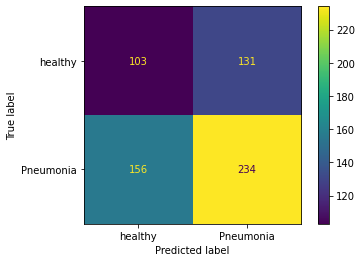

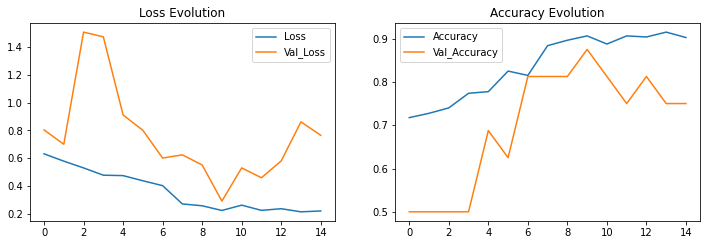

In [17]:
# Train and test data accuracy
train_acc3 = model3.evaluate(Train,steps=326)
test_acc3 = model3.evaluate(Test,steps=78)
print (f'Train data accuracy is: {train_acc3[1]*100} %')
print (f'Test data accuracy is: {test_acc3[1]*100} %')

# Confusion matrix
Y_pred = model3.predict(Test, steps = len(Test))
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Test.classes, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['healthy','Pneumonia'])
cmd.plot()

#Printing loss and accuracy evolution 
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_model3.history['loss'], label='Loss')
plt.plot(cnn_model3.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn_model3.history['accuracy'], label='Accuracy')
plt.plot(cnn_model3.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
